# Introduction to Regression

### Data Science 410


## Introduction

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the **best fit** to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). *Best fit* means that there is an optimal set of parameters which minimize an error criteria we choose.

Regression models attempt to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explanatory variables** or **features**. **Single regression** has one label used to predict one feature. **Multiple regression** uses two of more feature variables to predict a label. 

Many machine learning models, including some of the latest deep learning methods, are a form of regression. **Linear regression** is the foundational form of regression. Linear regression minimizes squared error of the predictions of the dependent variable using the values of the independent variables. This approach is know as the **method of least squares**.

By developing an understanding of linear regression, you are building a foundation to understand many other machine learning models. Nearly all machine learning methods suffer from the same problems, including over-fitting and mathematically unstable fitting methods. Understanding these problems in the linear regression context will help you work with other machine learning models.  

## History

Regression is based on the method of least squares or the method of minimum mean square error. The idea of averaging errors have been applied for nearly three centuries. The fist known publication of a *method of averages* was by the German astronomer Tobias Mayer in 1750. Lapace used a similar method which he published in 1788.

<img src="img/TobiasMayer.jpg" alt="TobiasMayer" style="width: 200px;"/>

The first publication of the **method or least squares** was by the French mathematician Adrien-Marie Legendre in 1805. Legendre was a brilliant mathematician, known for his unpleasant personality.  

![](img/Legendre.jpg)
<center>Caricature of Legendre, published method of least squares</center>

It is very likely that the German physicist and mathematician Gauss developed the method of least squares as early as 1795, but did not publish the method until 1809, aside from a reference in a letter in 1799. Gauss never disputed Legendre's priority in publication. Legendre did not return the favor, and opposed any notion that Gauss had used the method earlier. 

![](img/Carl_Friedrich_Gauss.jpg)
<center>Carl Friedrich Gauss, early adopter of the least squares method</center>

The first use of the term **regression** was by Francis Gaulton, a cousin of Charles Darwin, in 1886. Gaulton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. Gaulton used the term **regression to the mean** to describe the natural processes he observed in inherited traits.  

<img src="img/Francis_Galton.jpg" alt="Drawing" style="width:225px; height:250px"/>
<center>Francis Galton, inventor of regression</center>

While Gaulton invented a modern form regression, it fell to Karl Pearson to put regression and multiple regression on a firm mathematical footing. Pearson's 1898 publication proposed a method of regression as we understand it today. 

Many others have expanded the theory of regression in the 120 years since Pearson's paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times the interest in machine learning has lead to a rapid increase in the numbers and types of regression models. 

## Introduction to Theory of Linear Regression

We will focus on the theory of **linear models**, which are foundational. Key properties of linear models include:
- Derived with linear algebra.
- Include any model **linear in coefficients**, including polynomials, splines, Gaussian kernels and many other nonlinear function.    
- Understanding linear models is basis for understanding behavior many other statistical or machine learning models.
- Basis of many time series models.



### Linear model of a strait line

Let's have a look at the simple case of a regression model for a straight line. For this example we will work with single regression with one feature and one label. The data are in the form of some number of values pairs, $\{x_i,y_i \}$. 

The goal of this regression model is to find a straight that best fits the observed data. We can define the line by two coefficients or **parameters**, the **slope** and the **intercept**. A general representation of this parameterization of a straight line is illustrated in the figure below.

<img src="img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

Where,  

\begin{align}
m &= slope = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y &= b\ at\ x = 0
\end{align}


For each of the pairs of observed values, ${x_i,y_i}$, we can write the equation for the line with the errors as:

\begin{align}
y_i &= mx_i + b + \epsilon_i \\
where \\
\epsilon_i &= error
\end{align}

We can visualize these errors as shown in the figure below.

<img src="img/LSRegression.jpg" alt="LSRegression" style="width: 450px;"/>
<center>Example of least squares regression with errors shown as vertical lines</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least squares regression** problem.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

There are lots of computationally efficient algorithms for finding minimums of equations. 

## Linear regression assumptions

Now we should discuss a few key assumptions of linear regression. Keep these points in mind whenever you use these models. 

1. There is a **linear relationship** between dependent variable and the **coefficients** of the independent variables. This does not mean the function approximation used must be linear. Only that the model must be linear in the coefficients. 
2. Measurement error is independent and random. Technically, we say that the error is **independent identical distribution, or iid**.
3. Errors arise from the dependent variable only. Other models, such as complete regression, must be used if there are errors in the independent variable. 
The diagram below illustrates the iid errors for the dependent variable only.

![](img/IndependentErrors.jpg)

4. There is no **multicolinearity** between the features or independent variables. In other words, there is no significant correlation between the features.
5. The **residuals** are **homoscedastic** (constant variance).  In other words, the errors are the same across all values of the independent variables. We have explore this concept further.

## A First Regression Model

Let's give regression a try. The code in the cell below computes data pairs along a straight line. Normally distributed noise is added to the data values. Run this code and examine the head of the data frame.

In [127]:
import numpy as np
import numpy.random as nr
import pandas as pd
import statsmodels.formula.api as sm
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 1

# Generate data columns
nr.seed(5666)
x_data = np.linspace(x_start, x_end, n_points) # The x values
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points) # The Normally distributed noise
y_data = np.linspace(y_start, y_end, n_points) + y_error + 1.0 # The y values including an intercept

# Put data in dataframe
sim_data = pd.DataFrame({'x':x_data, 'y':y_data})

sim_data.head()

,x,y
0,0.000000,1.475868
1,0.204082,0.915564
2,0.408163,2.216802
3,0.612245,1.362557
4,0.816327,3.521151


Next, you can visualize these data by executing the code in the cell below. Notice that the points nearly fall on a straight line.

(0, 11)

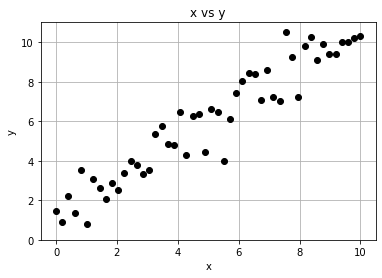

In [129]:
# Matplotlib may give some font errors when loading for the first time, you can ignore these
plt.plot(sim_data['x'], sim_data['y'], 'ko')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.ylim(0,11)

###  Fitting a Linear Regression Model

Now, you are ready to build and evaluate a regression model using Python. There are a number of Python libraries that contain linear modeling capabilities.

The [scikit-learn](https://scikit-learn.org/stable/) package has many different types of machine learning algorithms. Scikit-lean model interfaces take a machine learning perspective. The data arguments for Scikit-learn models are numpy arrays which must be dimensioned properly.

Another Python package with linear model capability is [statsmodels](https://www.statsmodels.org/stable/index.html). This package takes a statistical perspective, which we adopt here. A nice feature of statsmodels is that the data argument is a Pandas data frame. 

You can specify statsmodels models using the [R-style model language](https://www.statsmodels.org/devel/example_formulas.html). If you are not familiar with the R model language interface, read the summary below before proceeding. For those that have experience with the programming language, R, statsmodels will seem the most similar because it provides a R-like model language interface. 



> **R-Style Model Formulas**    
> The code in the cell below uses an R style model formula. This modeling language was introduced in [Chambers and Hastie, 1992, Statistical Models in S](https://www.taylorfrancis.com/books/e/9780203738535).     

> For a good [**cheatsheet and summary of the R modeling language**](http://faculty.chicagobooth.edu/richard.hahn/teaching/formulanotation.pdf) look at the posting by Richard Hahn of the Chicago Booth School.    

> Models are defined by an equation using the $\sim$ symbol to mean *modeled by*. In summary, the variable to be modeled is always on the left. The relationship between the variable to be modeled on the right. This basic scheme can be written: 

$$dependent\ variable\sim indepenent\ variables$$

> For example, if the dependent variable (dv) is modeled by two independent variables (var1 and var2), with no interaction, the formula would be:
$$dv \sim var1 + var2$$

In our case, there is only one independent variable and one dependent variable. The code in the cell below does the following:  

- The model formula is specified as $y \sim x$.
- An [ols (ordinary least squares)](http://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) model object is specified using the model formula and the data frame. Here, we use the lower case *ols* function so that the model language can be specified in the call. 
- The *fit* method is applied to the ols object. 
- The slope and intercept point estimates are printed. 

Execute this code and note the coefficient values.

In [130]:
## Define the regresson model and fit it to the data
ols_model = sm.ols(formula = 'y ~ x', data=sim_data).fit()

## Print the model coefficient
print('Intercept = %4.3f  Slope = %4.3f' % (ols_model._results.params[0], ols_model._results.params[1]))

Intercept = 1.306  Slope = 0.941


The intercept and slope are close to the actual values of 1.0 and 1.0. However, we need a more thorough examination of the results before we can say this is a good model for these data.  

As a first step toward evaluating this model, we can compute the predicted values of y given the values of x. Execute the code in the cell below which uses the *predict* method to compute these predicted values. 

In [131]:
# Add predicted to pandas dataframe
sim_data['predicted'] = ols_model.predict(sim_data.x)
# View head of data frame
sim_data.head(10)

,x,y,predicted
0,0.000000,1.475868,1.305594
1,0.204082,0.915564,1.497657
2,0.408163,2.216802,1.689720
3,0.612245,1.362557,1.881783
4,0.816327,3.521151,2.073846
5,1.020408,0.818881,2.265908
6,1.224490,3.096915,2.457971
7,1.428571,2.631663,2.650034
8,1.632653,2.074532,2.842097
9,1.836735,2.897740,3.034160


For a single regression model, we can plot the values of the predicted line along with the actual data values on a 2-dimensional plot. For models with multiple features, [partial regression plots](https://en.wikipedia.org/wiki/Partial_regression_plot) can be created, but are more complex to understand. 

Execute the code in the cell below to create the plot and examine the results. 

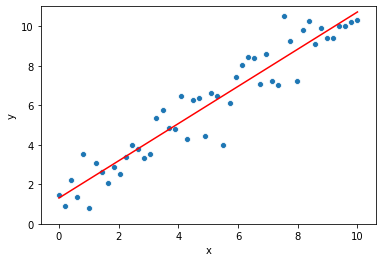

In [132]:
ax = sns.lineplot(x='x', y='predicted', data=sim_data, color='red')
sns.scatterplot(x='x', y='y', data=sim_data, ax=ax)
_=ax.set_ylim(0,11)

So far, so good. The predicted regression line does seem to fit the data well. But, how can we quantify the performance of this model? 

### Evaluation of regression models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. There is no one metric that can be used to evaluate a linear model, or any other type of machine learning model. Here as in any other case, we will in fact use multiple metrics to evaluate the linear regression model. 

The evaluation of regression models is based on measurements of the errors. The errors of a regression model can be visualized as shown in the figure below. 

<img src="img/Errors.jpg" alt="Regression_Errors" style="width: 450px;"/>
<center>Measuring errors for a regression model</center>  
    
    
Let's start with the observed values of the feature, $X$, and label, $Y$.      

\begin{align}
X &= [x_1, x_2, \ldots, x_n]\\
Y &= [y_1, y_2, \ldots, y_n]\\
where\\
x_i &= ith\ feature\ value\\
y_i &= ith\ label\ value\\
\end{align}

The results of the regression model are **estimates** which we write:   

\begin{align}
\bar{Y} &= mean(Y)\\
\hat{y_i} &= regression\ estimate\ of\ y_i
\end{align}  

Given the above we can define the follow **sum of squares** relationships:   

\begin{align}
SSE &= sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR &= sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST &= sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2 \\
SST &= SSR + SSE
\end{align}

The goal of regression is to minimize the residual error, $SSR$. In other words, when fitting the model we wish to explain the maximum amount of the variance in the original data. We can quantify the **faction of squared error explained** with the **coefficient of determination** also known as $R^2$. We can express $R^2$ as follows:

$$R^2 = 1 - \frac{SSR}{SST}$$

The $R^2$ for a perfect model would behave as follows:   

\begin{align}
SSR &\rightarrow 0\\
which\ leads\ to \\
R^2 &\rightarrow 1
\end{align}

In words, a model which perfectly explains the data has $R^2 = 1$. A model which does not explain the data at all has: 

\begin{align}
SSR &= SST \\ 
and \\ 
R^2 &= 0
\end{align}


However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.    
 
To addresses these related issues, we use **adjusted $R^2$**.

\begin{align}
R^2_{adj} &= 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_{SSR} &= SSR\ degrees\ of\ freedom\\
df_{SST} &= SST\ degrees\ of\ freedom
\end{align}

This gives $R^2_{adj}$ as:

\begin{align}
R^2_{adj} &= 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n &= number\ of\ data\ samples\\
k &= number\ of\ model\ coefficients
\end{align}

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$



You can see an extensive summary of the fit of the linear model with the *summary* method. Execute the code in the cell below and examine the output. 

In [133]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     469.5
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.97e-26
Time:                        19:33:36   Log-Likelihood:                -64.907
No. Observations:                  50   AIC:                             133.8
Df Residuals:                      48   BIC:                             137.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3056      0.252      5.180      0.000       0.799       1.812
x              0.9411      0.043     21.668      0.000       0.854       1.028
==============================================================================
Omnibus:                        0.850   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.450
Skew:                          -0.228   Prob(JB):                        0.799
Kurtosis:                       3.091   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's examine some of these values.   

- Let's start with the **model coefficients**. The report includes an hypothesis test on the statistical significance of the model coefficients. In this case we can interpret this significance as follows: For both the **intercept** and **slope** the t-statistic is large, p-value is small, and the confidence interval does not include zero. These coefficients are statistically significant.
- The **F-statistic** and **Prob (F-statistic)** are a measure of the significance of the model against a **null model that does not explain the data**. In this case the large F-statistic and small probability indicate that we can reject this null hypothesis and say the model is significant in terms of explaining the data.  
- The $R^2$ value is shown in the upper right corner. The value of 0.91 indicates a relatively good model fit.   
- The **adjusted $R^2$** shown in the summary indicates that the model is a good fit. To find this quantity, notice the following: 
  - The **number of observations** and is the $df_{SST}$. 
  - The **degrees of freedom residuals** is the $df_{SSR}$. 
  - Notice that $df_{SST} - df_{SSR} =$ number of model coefficients. 
  
> **Warning:** The hypothesis tests on model coefficients suffer from the same problems of any hypothesis test. These problems are especially prevalent when the are large numbers of model parameters. For example, finding coefficients significant that are not, or vice versa is not uncommon. This situation can be aggravated when features have significant colinearity (correlation). 

### Analysis of Residuals

There is one more important topic in evaluating regression models, the analysis of the **residuals**. The residuals of a regression model are the difference between the predicted values and actual values of the label. In other words, the residuals are the error term we write as $\epsilon_i$ for the ith observation.

A good linear regression model should have residuals with the following properties: 

1. The residuals should be approximately **Normally distributed with zero mean**. This criteria applied to any regression model using a least squares loss function. The least squares fitting criteria is only optimal for Normally distributed and zero mean residuals. We can express this important relationship mathematically as:  

\begin{align}
y_i &  mx_i + b + \epsilon_i \\
where, \\
\epsilon_i &= N(0, \sigma)
\end{align}

2. The residuals should be **homoscedastic** with respect to the predicted values, $\hat{Y}$. Homoscedastic residuals have constant variance, $\sigma$ with respect to the predicted values. This criteria applies to any form of regression model. If this is not the case, we say that the residuals are **heteroscedastic**, with variance changing with respect to the predicted values. In other words, the variance is a function of the predicted values, $\sigma(x_i) = f(x_i)$. A model with heteroscedastic residuals will have a better fit for small predicted values than large predicted values, or vice versa. We can write a model for hetroscedastic residuals as: 

\begin{align}
\epsilon_i &= N(0, f(x_i))\\
for\ example\\
\epsilon_i &= N(0, e^{x_i})
\end{align}


To start our analysis of residuals, execute the code in the cell below to compute residuals for the model. 

In [134]:
# Add residuals to pandas dataframe
sim_data['resids'] = np.subtract(sim_data.predicted, sim_data.y)

# View head of data frame
sim_data.head(10)

,x,y,predicted,resids
0,0.000000,1.475868,1.305594,-0.170274
1,0.204082,0.915564,1.497657,0.582093
2,0.408163,2.216802,1.689720,-0.527082
3,0.612245,1.362557,1.881783,0.519226
4,0.816327,3.521151,2.073846,-1.447306
5,1.020408,0.818881,2.265908,1.447027
6,1.224490,3.096915,2.457971,-0.638943
7,1.428571,2.631663,2.650034,0.018371
8,1.632653,2.074532,2.842097,0.767565
9,1.836735,2.897740,3.034160,0.136420


We can measure the dispersion of the residuals as a measure of regression performance. The metric is root mean square error or RMSE, which is very close to the standard deviation:

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \frac{\sqrt{SSR}}{n}$$

We should also determine if the mean of the residuals is approximately 0. 

Execute the code in the cell below to compute and display the mean and RMSE for the model. 

In [135]:
print('The mean of the residuals = %4.3f' % (np.mean(sim_data.resids)))
## Print RMSE
RMSE = np.std(sim_data.resids)
print('RMSE = %4.3f' % (RMSE))

The mean of the residuals = 0.000
RMSE = 0.886


This is a reasonable value for RMSE considering the scale of the lable, $\{0,11\}$. Further, the mean of the residuals is effectively 0. 

Next, we need to determine if the distribution of the residuals is approximately Normal. Execute the code in the cell below to plot a histogram and Q-Q Normal plot of the residuals.  

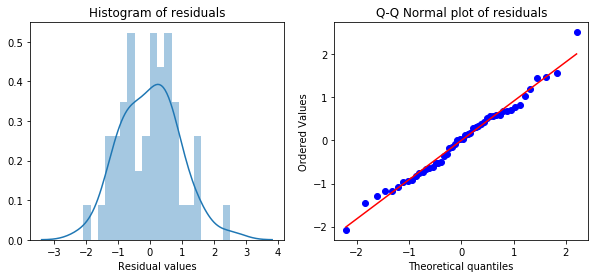

In [136]:
def plot_resid_dist(resids):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ## Plot a histogram
    sns.distplot(resids, bins=20, ax=ax[0])
    ax[0].set_title('Histogram of residuals')
    ax[0].set_xlabel('Residual values')
    ## Plot the Q-Q Normal plot
    ss.probplot(resids, plot = ax[1])
    ax[1].set_title('Q-Q Normal plot of residuals')
    plt.show()

plot_resid_dist(sim_data.resids)

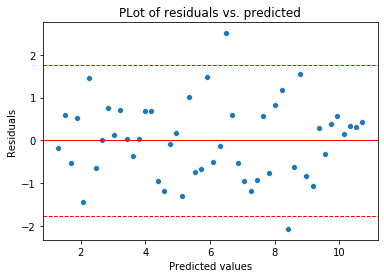

In [137]:
def residual_plot(df):
    RMSE = np.std(df.resids)
    sns.scatterplot(x='predicted', y='resids', data=df)
    plt.axhline(0.0, color='red', linewidth=1.0)
    plt.axhline(2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.axhline(-2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.title('PLot of residuals vs. predicted')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.show()
    
residual_plot(sim_data)    

**Your Turn:** Create a regression model from synthetic data with intercept of 0 and maximum value at ${x = 10, y = 10}$, and with the error having a standard deviation of 5. 

As a first step, execute the code in the cell below to generated the simulated data.  

In [138]:
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 5

# Generate data columns
nr.seed(545454)
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error + 1.0 

# Put data in dataframe
reg_data_5 = pd.DataFrame({'x':x_data, 'y':y_data})

reg_data_5.head()

,x,y
0,0.000000,-0.943875
1,0.204082,8.722908
2,0.408163,-3.264018
3,0.612245,-3.107354
4,0.816327,3.546238


Next, in the cell below create and execute the code to define and fit the OLS model and print the summary.

In [139]:
# Fit the model and get the linear model summaries/plots.
ols5_model = sm.ols(formula='y ~ x', data = reg_data_5).fit()

ols5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     27.16
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           3.91e-06
Time:                        19:33:36   Log-Likelihood:                -144.99
No. Observations:                  50   AIC:                             294.0
Df Residuals:                      48   BIC:                             297.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3030      1.250      0.242      0.810      -2.211       2.817
x              1.1229      0.215      5.211      0.000       0.690       1.556
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.577
Skew:                          -0.246   Prob(JB):                        0.749
Kurtosis:                       2.810   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Examine the model summary and consider the answers to these questions:
1. Are both model coefficients still significant?    
2. Is the model still significant based on the F-statistic? 
3. How have $R^2$ and adjusted $R^2$ changed and what does this mean in terms of the fit of the model? 

Now create and execute code to do the following:   
1. Compute and print the mean of the residuals.
2. Compute and print the RMSE.
3. Plot the histogram and Q-Q Normal plot of the residuals.
4. Plot the residuals vs. the predicted values.

The mean of the residuals = 0.094
RMSE = 4.429


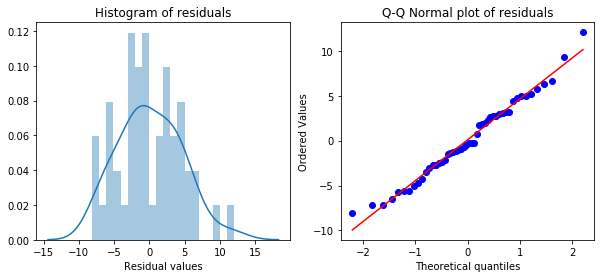

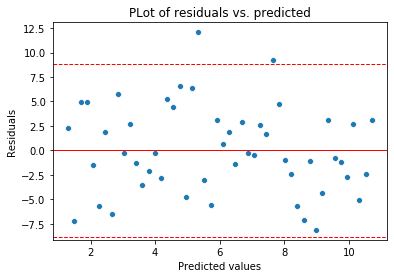

In [140]:
reg_data_5['predicted'] = ols_model.predict(reg_data_5.x)
reg_data_5['resids'] = np.subtract(reg_data_5.predicted, reg_data_5.y)

print('The mean of the residuals = %4.3f' % (np.mean(reg_data_5.resids)))
## Print RMSE
RMSE = np.std(reg_data_5.resids)
print('RMSE = %4.3f' % (RMSE))

plot_resid_dist(reg_data_5.resids)
residual_plot(reg_data_5)  

Examine these results and consider the answers to the following questions:
1. How has the RMSE changed?
2. Do the residuals appear to be approximately Normally distributed with zero mean?
3. Are the residuals homoscedastic?

## Linear regressions are not just for straight lines

A linear model is linear in its coefficients. But, that does not mean we are limited to straight lines, **a common misconception**.  A partial list of functions which can be included in a linear model includes:

- Polynomials, but beware of polynomials of degree 3 or above.
- Splines and smoothing kernels.
- trigonometric functions.
- Logarithmic and exponential functions.
- Interaction terms, which are the product of feature values. For example, the two-way interaction of var1 and var2. In the R modeling language, interactions are specified as $var1:var2$. You can express the using both varibles plus the interaction as, $var1*var2 = var1 + var2 + var1:var2$.  

### An Example

To clarify these concepts, let's look at an example. The code in the cell below computes a data set with a polynomial trend.

In [141]:
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 1

# Generate data columns
nr.seed(474747)
x_data = np.linspace(x_start, x_end, n_points) # The x values
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points) # The Normally distributed noise
y_data = x_data + 0.6 * np.square(x_data) + y_error + 1.0 # The y values including an intercept

# Put data in dataframe
sim_data_poly = pd.DataFrame({'x':x_data, 'y':y_data})

sim_data_poly.head()

,x,y
0,0.000000,2.081760
1,0.204082,1.619740
2,0.408163,0.792484
3,0.612245,3.006270
4,0.816327,3.489881


In [142]:
## Define the regresson model and fit it to the data
ols_model = sm.ols(formula = 'y ~ x', data=sim_data_poly).fit()

# Add predicted to pandas dataframe
sim_data_poly['predicted'] = ols_model.predict(sim_data_poly.x)

## Print the model coefficient
print('Intercept = %4.3f  Slope = %4.3f' % (ols_model._results.params[0], ols_model._results.params[1]))

Intercept = -8.764  Slope = 6.989


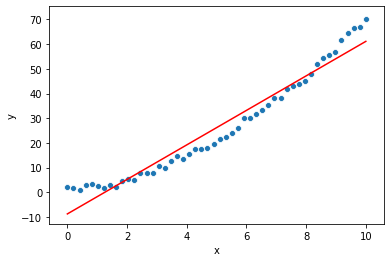

In [143]:
ax = sns.lineplot(x='x', y='predicted', data=sim_data_poly, color='red')
sns.scatterplot(x='x', y='y', data=sim_data_poly, ax=ax)

The mean of the residuals = 0.000
RMSE = 4.706


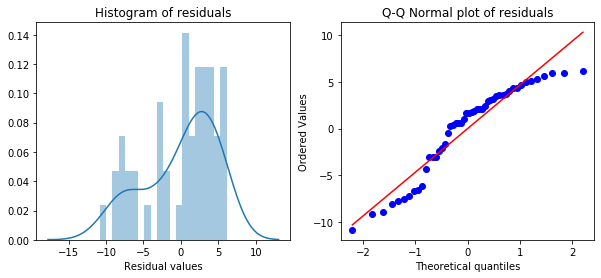

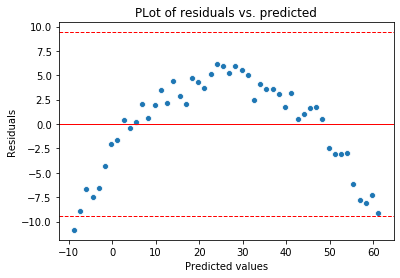

In [144]:
sim_data_poly['resids'] = np.subtract(sim_data_poly.predicted, sim_data_poly.y)

print('The mean of the residuals = %4.3f' % (np.mean(sim_data_poly.resids)))
## Print RMSE
RMSE = np.std(sim_data_poly.resids)
print('RMSE = %4.3f' % (RMSE))

plot_resid_dist(sim_data_poly.resids)
residual_plot(sim_data_poly)  

### Using Polynomial Features

Given the poor fit of the first model, it is time to try something else. In this case, we will try using polynomial terms. 

The code in the cell below adds second and third order polynomial features to the data frame. Execute the code.  

In [145]:
sim_data_poly['x_square'] = np.square(sim_data_poly.x)
sim_data_poly['x_cube'] = np.multiply(sim_data_poly.x, sim_data_poly.x_square)
sim_data_poly.head()

,x,y,predicted,resids,x_square,x_cube
0,0.000000,2.081760,-8.764218,-10.845978,0.000000,0.000000
1,0.204082,1.619740,-7.337869,-8.957609,0.041649,0.008500
2,0.408163,0.792484,-5.911520,-6.704004,0.166597,0.067999
3,0.612245,3.006270,-4.485171,-7.491441,0.374844,0.229496
4,0.816327,3.489881,-3.058822,-6.548702,0.666389,0.543991


####  Scaling Data

When performing regression with numeric variables you will almost **always scale the data**.  Scaling data is important not just for regression, but most other machine learning models. Some reasons to scale regression data include:

- The intercept may be a long way from the actual data. With scaled features, the intercept is at the centroid of the distribution. 
- Scaling prevents features with a large numerical range from overwhelming featuures with small numerical values. Numerical range is not an indicator of feature importance!

There are several possibile approaches to scaling data:
 - Scale the features or independent variables. This is the most common practice.
 - Scale the label or dependent variable.
 - Scale both, which is another common practice
 
In this case, we will just scale the one feature. Execute the code in the cell below and examine the results. 

In [146]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

for col in ['x','x_square','x_cube']:
    sim_data_poly[col] = scale(sim_data_poly[col])
    
sim_data_poly.head(10)

,x,y,predicted,resids,x_square,x_cube
0,-1.697749,2.081760,-8.764218,-10.845978,-1.105709,-0.874340
1,-1.628453,1.619740,-7.337869,-8.957609,-1.104341,-0.874311
2,-1.559158,0.792484,-5.911520,-6.704004,-1.100238,-0.874107
3,-1.489862,3.006270,-4.485171,-7.491441,-1.093400,-0.873553
4,-1.420566,3.489881,-3.058822,-6.548702,-1.083827,-0.872475
5,-1.351270,2.662956,-1.632473,-4.295428,-1.071519,-0.870698
6,-1.281974,1.853803,-0.206124,-2.059926,-1.056475,-0.868047
7,-1.212678,2.877495,1.220225,-1.657269,-1.038696,-0.864347
8,-1.143382,2.216242,2.646574,0.430333,-1.018182,-0.859424
9,-1.074086,4.531405,4.072924,-0.458481,-0.994933,-0.853102


Notice that the new `x_scale` feature has some additional attributes. These attributes are used to scale new data on which you are making predicitons. This model **will not work on unscaled** data. 

Run the code in the cell below to create and evaluate a regression model using the scaled data. 


**Your Turn:**

In the cell below use the data you created earlier to compute and evaluate a regression model using a scaled feature. Which performance metrics are the same and which are different.

In [147]:
## Define the regresson model and fit it to the data
ols_model_poly = sm.ols(formula = 'y ~ x + x_square + x_cube', data=sim_data_poly).fit()

# Add predicted to pandas dataframe
sim_data_poly['predicted'] = ols_model_poly.predict(sim_data_poly[['x','x_square','x_cube']])

## Print the model coefficient
params = ols_model_poly._results.params
#print(params)
print('Intercept = %4.3f  Slope = %4.3f  Slope2 = %4.3f  Slope = %4.3f' % (params[0], params[1], params[2], params[3]))

Intercept = 26.181  Slope = 1.578  Slope2 = 22.070  Slope = -2.555


In [150]:
ols_model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7125.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           2.37e-61
Time:                        19:34:33   Log-Likelihood:                -69.859
No. Observations:                  50   AIC:                             147.7
Df Residuals:                      46   BIC:                             155.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1813      0.144    181.476      0.000      25.891      26.472
x              1.5779      1.382      1.142      0.259      -1.204       4.360
x_square      22.0696      3.340      6.608      0.000      15.347      28.792
x_cube        -2.5552      2.102     -1.215      0.230      -6.787       1.676
==============================================================================
Omnibus:                        1.054   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.964
Skew:                           0.132   Prob(JB):                        0.618
Kurtosis:                       2.374   Cond. No.                         49.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

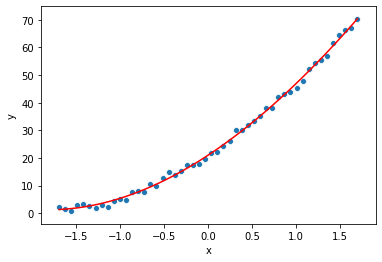

In [148]:
ax = sns.lineplot(x='x', y='predicted', data=sim_data_poly, color='red')
sns.scatterplot(x='x', y='y', data=sim_data_poly, ax=ax)

The mean of the residuals = 0.000
RMSE = 0.978


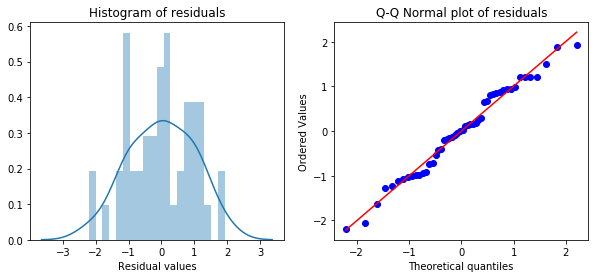

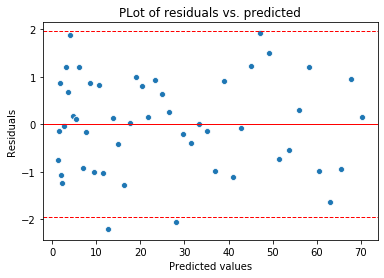

In [149]:
sim_data_poly['resids'] = np.subtract(sim_data_poly.predicted, sim_data_poly.y)

print('The mean of the residuals = %4.3f' % (np.mean(sim_data_poly.resids)))
## Print RMSE
RMSE = np.std(sim_data_poly.resids)
print('RMSE = %4.3f' % (RMSE))

plot_resid_dist(sim_data_poly.resids)
residual_plot(sim_data_poly)  

# Your Turn:

Compute a linear model using a straight line for the polynomial curve data. Compare the plots and the performance metrics. **Use a different model name and copy the dataframe to a new name so the notebook works correctly**

In [ ]:
mod_poly_linear = sm.ols(formula = 'y ~ x', data = reg_data_poly).fit()

# Get most of the linear regression statistics we are interested in:
print(mod_poly_linear.summary())

# Plot a histogram of the residuals
y5_pred_poly_linear = mod_poly_linear.predict(reg_data_poly['x'])

plt.subplot(1, 2, 1)
sns.distplot(mod_poly_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Linear on Polynomial)')

plt.subplot(1, 2, 2)
plt.scatter(reg_data_poly['x'], reg_data_poly['y'])
plt.plot(reg_data_poly['x'], y5_pred_poly_linear, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Linear on Polynomial)')

## Scaling Revisited

# Your Turn:

Now that you have worked with scaled and unscaled models and the various summary statistics try this exercise. Use the various summary and plotting capabilities we have demonstrated to compute model evaluations for the two (scaled and unscaled feature) straight line regression models you computed. Compare these results noticing the diffences. 

## Homoscedastic and Heteroscedastic Errors

Let's elaborate on some of the assumptions for the linear model. 

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = N(0, \sigma)$$

In this model the errors, $\epsilon_i$, do not depend on the dependent variable `y`. In this case we say the errors are **homoscedastic**.

But what if:

$$\epsilon_i = N(0, f(x_i))\\
such\ as\\
\epsilon_i = N(0, e^{x_i})$$

These errors are now **heteroscedastic**, with the errors dependent on `x` and hence not constant in `y`.

Let's look at an example. In the code below the error increases linerly as `x` increases. Run this code and examine the result.

In [ ]:
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 5

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
# Now add heteroscedasticity to y_error
y_error = y_error * np.linspace(0, 10, n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
het_data = pd.DataFrame({'x':x_data, 'y':y_data})

het_data.head()

#mod.het = lm(y ~ x, data = reg.data.het)
#reg.data.het = reg.data.het
#reg.data.het$score <- predict(mod.het, data = reg.data.het)
#reg.data.het$resids <- reg.data.het$y - reg.data.het$score
#plot.regression(reg.data.het, mod.het, k = 2)
#summary(mod.het)
#plot(mod.het)

In [ ]:
# Fit linear model and plot results/summaries
het_linear = sm.ols(formula = 'y ~ x', data = het_data).fit()

# Get most of the linear regression statistics we are interested in:
print(het_linear.summary())

# Plot a histogram of the residuals
y5_pred_het = het_linear.predict(het_data['x'])

plt.subplot(1, 2, 1)
sns.distplot(het_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Heteroscedastic Error)')

plt.subplot(1, 2, 2)
plt.scatter(het_data['x'], het_data['y'])
plt.plot(het_data['x'], y5_pred_het, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Heteroscedastic Error)')

In [ ]:
# Summary graphs:
#import scipy.stats as stats
#import statsmodels.api as statsmodels
#from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = het_linear.resid
fitted_vals = het_linear.predict(het_data['x'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (het_linear.resid - np.min(het_linear.resid)) / np.max(het_linear.resid)

# Leverage Plot (Cook's Distance)
influence_plot(het_linear)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(het_linear, "x", fig=fig)

Notice the following about these results, which violate the homoscedastic error assumption:

- The plot of residuals vs. the predicted value shows a systematic increase from left to right.
- The Q-Q plot and the histogram show that the distribution of residuals has heavy tails and deviates from Normal.
- The plot of the standardized residuals shows an increase from right to left on the plot.

## Leverage and Cook's Distance

Up to now, we have only looked at regression models with Normally distributed noise or errors. But, in the real world there are errors and outliers in data. These errors and outliers can have greater or lesser effect, depending on how extreem they are and their placement with respect to the other data. 

You can imagine a regression line as a lever. Outliers that occur near the ends of the lever will have a greater influence all other factors being equal. 

One way to measure influence of a data point is Cook's distance, introduced by Dennis Cook in 1977. The influence for the `ith` data point can be computed as:

$$D_i = \frac{\Sigma_{j=1}^n (\hat{Y_j} - \hat{Y_{j(i)}})^2}{n (p+1)\hat{\sigma^2}} \\
where \\
p = number\ of\ parameters\\
n = number\ of\ data\ points$$

In effect, cooks distance compares the difference between means with and without a given data point. Computing Cook's distance can be moderately computationally intensive for large data set. Typically, Cook's distance is measured in units of standard deviation.

Let's make these concepts concrete with an example. 

In [ ]:
sim_data.head()

In [ ]:
# Create new copy of original linear data
outlier_data = sim_data[['x', 'y']].copy()
# Add an outlier row
outlier = pd.DataFrame([[0.0, 20.0]], columns = ['x', 'y'])
outlier_data.append(outlier, ignore_index=True)

# Scale data
outlier_data['x_scaled'] = scale(outlier_data['x'])

# Fit linear model
outlier_linear = sm.ols(formula = 'y ~ x_scaled', data = outlier_data).fit()

# Get most of the linear regression statistics we are interested in:
print(outlier_linear.summary())

# Plot a histogram of the residuals
y_outlier = outlier_linear.predict(outlier_data['x_scaled'])

plt.subplot(1, 2, 1)
sns.distplot(outlier_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (With 1 Outlier)')

plt.subplot(1, 2, 2)
plt.scatter(outlier_data['x_scaled'], outlier_data['y'])
plt.plot(outlier_data['x_scaled'], y_outlier, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (With 1 Outlier)')

In [ ]:
# Get Linear Regression Summary Plots
# Summary graphs:
#import scipy.stats as stats
#import statsmodels.api as statsmodels
#from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = outlier_linear.resid
fitted_vals = outlier_linear.predict(outlier_data['x_scaled'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (w/ 1 outlier)')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (outlier_linear.resid - np.min(outlier_linear.resid)) / np.max(outlier_linear.resid)

# Leverage Plot (Cook's Distance)
influence_plot(outlier_linear)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(outlier_linear, "x_scaled", fig=fig)